In [1]:
# Importing libraries

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Reading the data

data = pd.read_csv('Data.csv')

In [3]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as index
data.set_index('Date', inplace=True)

In [4]:
# Displaying the first 5 rows of the data

data.head()

,3-month,1-year,2-year,3-year,5-year,10-year
Date,,,,,,
1953-04-01,2.19,2.36,2.435,2.51,2.62,2.83
1953-05-01,2.16,2.48,2.600,2.72,2.87,3.05
1953-06-01,2.11,2.45,2.595,2.74,2.94,3.11
1953-07-01,2.04,2.38,2.500,2.62,2.75,2.93
1953-08-01,2.04,2.28,2.430,2.58,2.80,2.95


In [5]:
# Displaying the last 5 rows of the data

data.tail()

,3-month,1-year,2-year,3-year,5-year,10-year
Date,,,,,,
1994-08-01,4.48,5.56,6.030,6.50,6.88,7.24
1994-09-01,4.62,5.76,6.225,6.69,7.08,7.46
1994-10-01,4.95,6.11,6.575,7.04,7.40,7.74
1994-11-01,5.29,6.54,6.990,7.44,7.72,7.96
1994-12-01,5.60,7.14,7.425,7.71,7.78,7.81


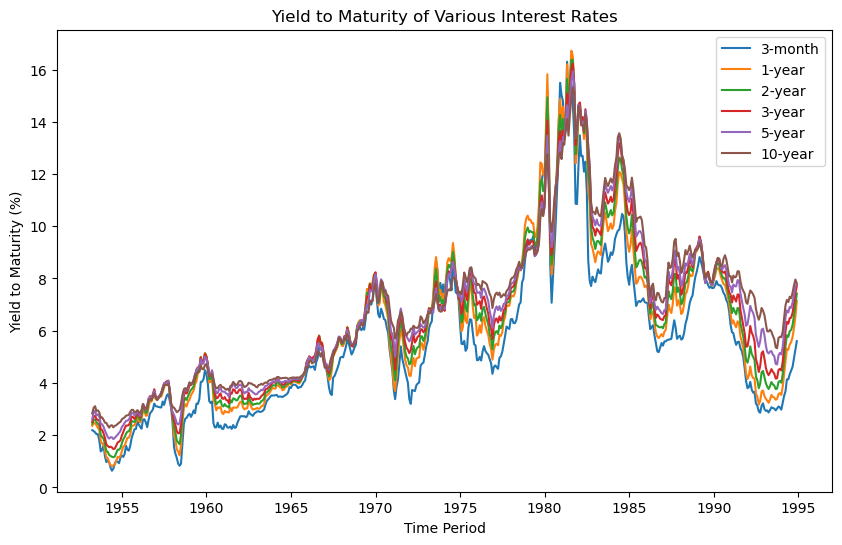

In [6]:
# Plot the data
plt.figure(figsize=(10,6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

# Add title and labels
plt.title('Yield to Maturity of Various Interest Rates')
plt.xlabel('Time Period')
plt.ylabel('Yield to Maturity (%)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [7]:
# Calculate monthly changes in interest rates
monthly_changes = data.diff().dropna()

# Define the factors: Level, Slope, Curvature
# Assuming columns are in order from short-term to long-term rates
level = monthly_changes.mean(axis=1) #avergae across maturities
slope = monthly_changes.iloc[:, -1] - monthly_changes.iloc[:, 0]  # Long-term rate minus short-term rate
curvature = 2 * monthly_changes.iloc[:, -2] - (monthly_changes.iloc[:, 0] + monthly_changes.iloc[:, -1])
# -short term + (2*medium term) - long term

In [8]:
monthly_changes.head()

,3-month,1-year,2-year,3-year,5-year,10-year
Date,,,,,,
1953-05-01,-0.03,0.12,0.165,0.21,0.25,0.22
1953-06-01,-0.05,-0.03,-0.005,0.02,0.07,0.06
1953-07-01,-0.07,-0.07,-0.095,-0.12,-0.19,-0.18
1953-08-01,0.00,-0.10,-0.070,-0.04,0.05,0.02
1953-09-01,-0.25,-0.08,-0.050,-0.02,-0.09,-0.08


In [9]:
# Create a DataFrame of factors Change
factors_df = pd.DataFrame({'Level': level, 'Slope': slope, 'Curvature': curvature})


In [10]:
# Displaying the first 5 rows 

factors_df.head()

,Level,Slope,Curvature
Date,,,
1953-05-01,0.155833,0.25,0.31
1953-06-01,0.010833,0.11,0.13
1953-07-01,-0.120833,-0.11,-0.13
1953-08-01,-0.023333,0.02,0.08
1953-09-01,-0.095000,0.17,0.15


In [11]:
# Computing the expected mean and standard deviation of factors

mean_level = factors_df['Level'].mean()
mean_slope = factors_df['Slope'].mean()
mean_curvature = factors_df['Curvature'].mean()

std_level = factors_df['Level'].std()
std_slope = factors_df['Slope'].std()
std_curvature = factors_df['Curvature'].std()

# Create a dictionary with the results
results_dict = {
    'Mean': [mean_level, mean_slope, mean_curvature],
    'Standard Deviation': [std_level, std_slope, std_curvature]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict, index=['Level', 'Slope', 'Curvature'])

# Display the DataFrame
print(results_df)


               Mean  Standard Deviation
Level      0.009507            0.390314
Slope      0.003140            0.385888
Curvature  0.003860            0.336911


In [12]:
# Store sensitivity results and R-squared values
sensitivity_results = {}
r_squared_values = {}

for maturity in monthly_changes.columns:
    # Define the independent variables (factors)
    X = factors_df
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    # Define the dependent variable (interest rate change for this maturity)
    y = monthly_changes[maturity]
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    # Store the results
    sensitivity_results[maturity] = model.params[1:]  # Ignore the constant
    r_squared_values[maturity] = model.rsquared  # Store R-squared value
    # Display the summary of the regression model
    print(f"Regression results for {maturity}:")
    print(model.summary())
    print("\n")

# Convert sensitivity results to a DataFrame
sensitivities_df = pd.DataFrame(sensitivity_results)

# Add R-squared values to the DataFrame
sensitivities_df.loc['R-squared'] = pd.Series(r_squared_values)

# Display the sensitivity coefficients along with R-squared
print("Sensitivity Coefficients and R-squared:")
sensitivities_df

Regression results for 3-month:
                            OLS Regression Results                            
Dep. Variable:                3-month   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.448e+04
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:36:08   Log-Likelihood:                 973.60
No. Observations:                 500   AIC:                            -1939.
Df Residuals:                     496   BIC:                            -1922.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.000

,3-month,1-year,2-year,3-year,5-year,10-year
Level,0.915491,1.150316,1.084509,1.018702,0.915491,0.915491
Slope,-0.408723,-0.191951,-0.091277,0.009397,0.091277,0.591277
Curvature,-0.295157,0.054706,0.128491,0.202275,0.204843,-0.295157
R-squared,0.995228,0.979796,0.993737,0.991037,0.990191,0.985945


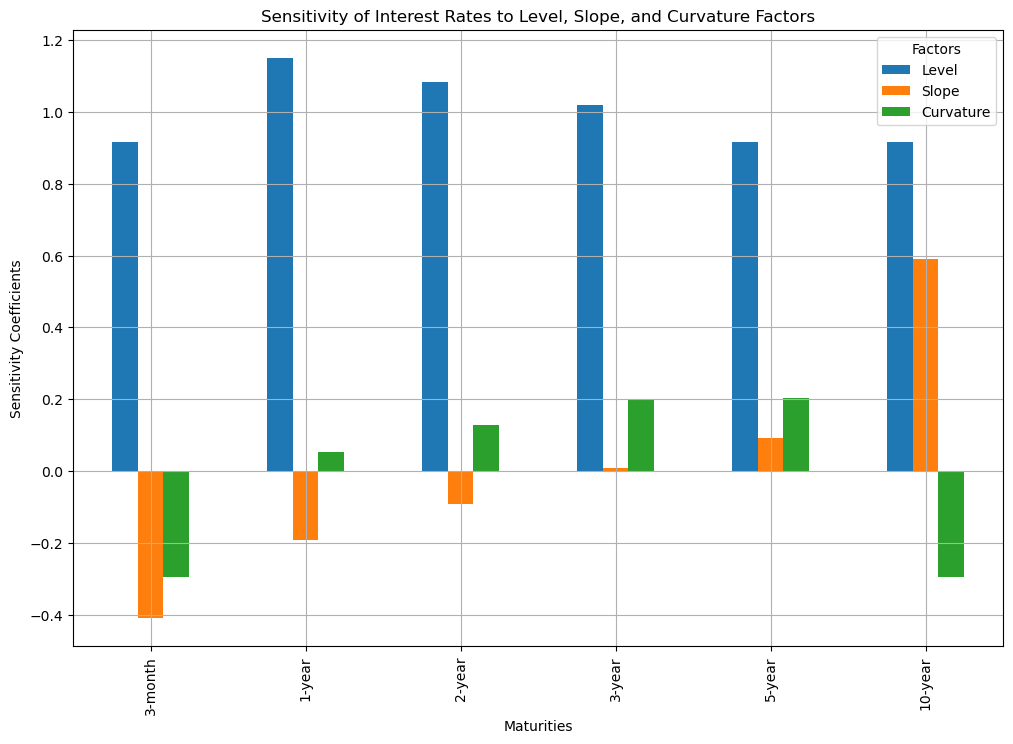

In [13]:
# Convert sensitivity results to a DataFrame for better visualization
sensitivities_df1 = pd.DataFrame(sensitivity_results).T

# Plot the sensitivities for visual representation
sensitivities_df1[['Level', 'Slope', 'Curvature']].plot(kind='bar', figsize=(12, 8))
plt.title('Sensitivity of Interest Rates to Level, Slope, and Curvature Factors')
plt.xlabel('Maturities')
plt.ylabel('Sensitivity Coefficients')
plt.legend(title='Factors')
plt.grid()
plt.show()

In [14]:
# Factor duration of 3-year zero coupon bond

sensitivities_df2=sensitivities_df.drop('R-squared',axis=0)
t = 3
factor_duration_z = t*sensitivities_df2['3-year']
factor_duration_z

Level        3.056105
Slope        0.028190
Curvature    0.606825
Name: 3-year, dtype: float64

In [16]:
# Define the time-to-maturity values and corresponding weights
time_maturities = [1, 2, 3]
weights_c = [0.1123, 0.1070, 0.7807]

# Calculate factor durations using matrix multiplication and assign to new column names
factor_durations_coupon = sensitivities_df2[['1-year', '2-year', '3-year']].multiply(time_maturities, axis=1)
factor_durations_coupon.columns = ['1-year Duration', '2-year Duration', '3-year Duration']

# Add weights as a new row to the DataFrame
factor_durations_coupon.loc['weights'] = weights_c

# Calculate the weighted Factor Duration for Level, Slope, and Curvature
factor_durations_coupon['Factor Duration'] = (
    factor_durations_coupon.iloc[:-1].multiply(weights_c, axis=1)
).sum(axis=1)

factor_durations_coupon



,1-year Duration,2-year Duration,3-year Duration,Factor Duration
Level,1.150316,2.169018,3.056105,2.747166
Slope,-0.191951,-0.182554,0.028190,-0.019081
Curvature,0.054706,0.256981,0.606825,0.507389
weights,0.112300,0.107000,0.780700,NaN


In [18]:
#dropping weights from the factor duration of the coupon bond dataframe above
factor_durations_coupon_2 = factor_durations_coupon.drop('weights', axis = 0)
factor_durations_coupon_2

,1-year Duration,2-year Duration,3-year Duration,Factor Duration
Level,1.150316,2.169018,3.056105,2.747166
Slope,-0.191951,-0.182554,0.028190,-0.019081
Curvature,0.054706,0.256981,0.606825,0.507389


In [19]:
#computing factor duration of the inverse floater
factor_duration_if = pd.concat([factor_durations_coupon_2[['1-year Duration', 'Factor Duration']], factor_duration_z], axis=1)
factor_duration_if = factor_duration_if.rename(columns={
    '1-year Duration': 'Floating Rate Duration',
    'Factor Duration': 'Coupon Duration',
    '3-year': 'Zero-Coupon Duration'
})

weights_if = [-0.8600, 1.1879, 0.7521]

# Add weights as a new row to the DataFrame
factor_duration_if.loc['weights'] = weights_if

# Calculate the Factor Duration by multiplying each duration by the corresponding weight and summing the results
factor_duration_if['Factor Duration'] = (
    factor_duration_if.loc['Level':'Curvature'].multiply(weights_if, axis=1)
).sum(axis=1)

factor_duration_if

,Floating Rate Duration,Coupon Duration,Zero-Coupon Duration,Factor Duration
Level,1.150316,2.747166,3.056105,4.572583
Slope,-0.191951,-0.019081,0.028190,0.163612
Curvature,0.054706,0.507389,0.606825,1.012073
weights,-0.860000,1.187900,0.752100,NaN


In [20]:
#dropping weights from the factor duration of the inverse floater dataframe above
factor_duration_if_2= factor_duration_if.drop('weights', axis = 0)
factor_duration_if_2

,Floating Rate Duration,Coupon Duration,Zero-Coupon Duration,Factor Duration
Level,1.150316,2.747166,3.056105,4.572583
Slope,-0.191951,-0.019081,0.028190,0.163612
Curvature,0.054706,0.507389,0.606825,1.012073


In [22]:
# Calculating Duration of the Portfolio
Portfolio_Total_value = 20.5 #billion
Inverse_floaters = 2.8 #billion
Zero_coupon = 17.7 # billion

weight_inv_floater =  Inverse_floaters/Portfolio_Total_value
weight_zero_coupon = Zero_coupon/Portfolio_Total_value

Portfolio_df = pd.concat([factor_duration_z, factor_duration_if_2['Factor Duration']], axis =1)
Portfolio_df = Portfolio_df.rename(columns = {'3-year': '3-year zero-coupon duration', 
                                              'Factor Duration' : 'Inverse floater duration'
                                             })

Portfolio_df['Portfolio Duration'] = weight_inv_floater * Portfolio_df['Inverse floater duration'] + weight_zero_coupon * Portfolio_df['3-year zero-coupon duration']

Portfolio_df





,3-year zero-coupon duration,Inverse floater duration,Portfolio Duration
Level,3.056105,4.572583,3.263234
Slope,0.028190,0.163612,0.046687
Curvature,0.606825,1.012073,0.662176


In [24]:
# Mean of the Expected changes in the Portfolio

mean_dp = Portfolio_Total_value * -(Portfolio_df.iloc[0,2]*mean_level + Portfolio_df.iloc[1,2]*mean_slope + Portfolio_df.iloc[2,2]*mean_curvature)

print(mean_dp)

# Standard deviation of the expected changes in the portfolio
std_dp = Portfolio_Total_value * (Portfolio_df.iloc[0,2]*std_level + Portfolio_df.iloc[1,2]*std_slope + Portfolio_df.iloc[2,2]*std_curvature)
print(std_dp)

# Value at Risk
VaR_99 = -mean_dp + 2.326*std_dp
VaR_99
f'The calculated VaR at the 99% confidence level is approximately 72.92 million.'

-0.691363927000007
31.053315179423223


'The calculated VaR at the 99% confidence level is approximately 72.92 million.'

In [ ]:
#Our personal Finding. #Prediction of interest rate using the regression equation

Predicted Change in Interest Rates for Each Maturity:
  Maturity  Predicted Change in Rate
0  3-month                  0.005600
1   1-year                  0.005190
2   2-year                  0.005234
3   3-year                  0.005182
4   5-year                  0.005100
5  10-year                  0.003600


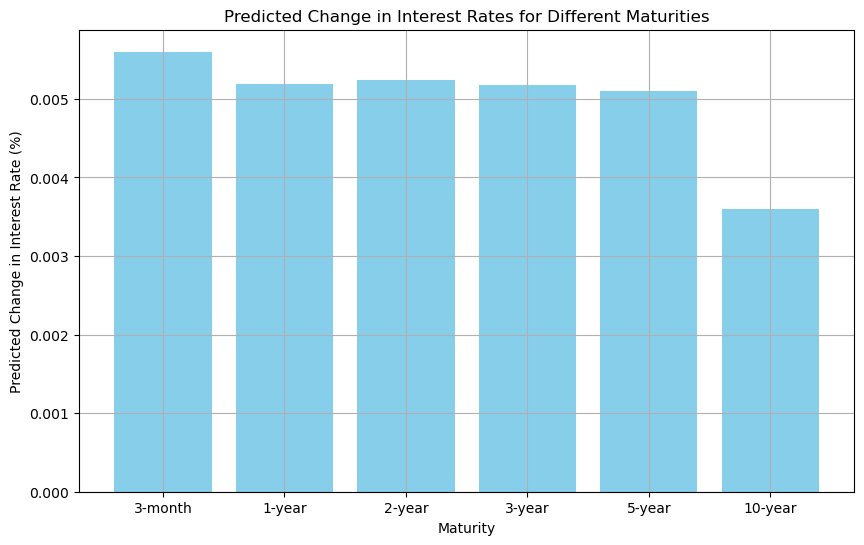

In [25]:
# Real world Scenario predictions of rates
delta_phi1 = 0.005  # Change in Level (+0.5%) i.e FED wants to control inflation
delta_phi2 = -0.002  # Change in Slope (-0.2%) i.e Slope is change from steep to flat
delta_phi3 = 0.001  # Change in Curvature (+0.1%) . i.e Short & Long rates rising, belly reducing. Buy belly and sell wings

# Sensitivity coefficients from your example (redefine for clarity)
sensitivity_coefficients = {
    '3-month': {'const': 0.0005, 'Level': 0.9155, 'Slope': -0.4087, 'Curvature': -0.2952},
    '1-year': {'const': -0.0010, 'Level': 1.1503, 'Slope': -0.1920, 'Curvature': 0.0547},
    '2-year': {'const': -0.0005, 'Level': 1.0845, 'Slope': -0.0913, 'Curvature': 0.1285},
    '3-year': {'const': -0.00009474, 'Level': 1.0187, 'Slope': 0.0094, 'Curvature': 0.2023},
    '5-year': {'const': 0.0005, 'Level': 0.9155, 'Slope': 0.0913, 'Curvature': 0.2048},
    '10-year': {'const': 0.0005, 'Level': 0.9155, 'Slope': 0.5913, 'Curvature': -0.2952}
}



# Calculate the predicted changes in interest rates for each maturity
predicted_changes = {}

for maturity, coeffs in sensitivity_coefficients.items():
    predicted_change = (coeffs['const'] +
                        coeffs['Level'] * delta_phi1 +
                        coeffs['Slope'] * delta_phi2 +
                        coeffs['Curvature'] * delta_phi3)
    predicted_changes[maturity] = predicted_change

# Convert to a DataFrame for better visualization
predicted_changes_df = pd.DataFrame(list(predicted_changes.items()), columns=['Maturity', 'Predicted Change in Rate'])

# Display the results
print("Predicted Change in Interest Rates for Each Maturity:")
print(predicted_changes_df)

# Optional: Visualize the predicted changes using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(predicted_changes_df['Maturity'], predicted_changes_df['Predicted Change in Rate'], color='skyblue')
plt.title('Predicted Change in Interest Rates for Different Maturities')
plt.xlabel('Maturity')
plt.ylabel('Predicted Change in Interest Rate (%)')
plt.grid(True)
plt.show()